In [214]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import LinearSegmentedColormap as cmap
import numpy as np

# Changepoint Quantification

An analysis of the change in trend before and after a change point has occurred within GDP per hour worked. Focussing on change points caused by the 2008 housing crisis. This will be done by looking specifically at the 2 years preceding and following the changepoint.

## All countries averaged

In [215]:
# Import Data
dataDirectory = "../Datasets/cleaned_Productivity.csv"
rawData = pd.read_csv(dataDirectory, header=0, nrows=None)
headers = list(rawData)
rawData = np.array(rawData)
countries = rawData[:,0]

In [216]:
# Trim to desired years
beginIndex = 6
endIndex = 11
rawData = rawData[:, beginIndex:endIndex]
headers = headers[beginIndex:endIndex]

Text(0.5, 0, 'Year')

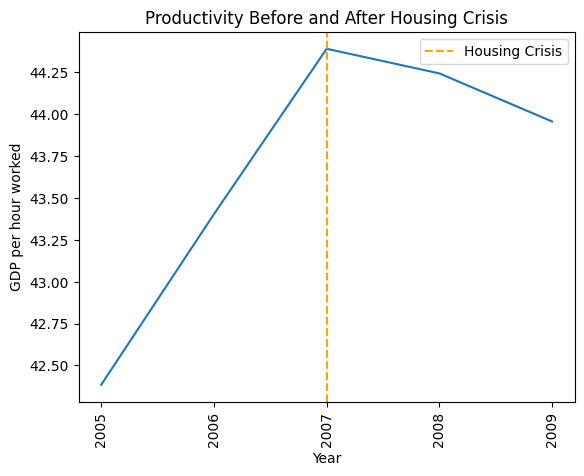

In [217]:
# Generate average productivity for each year
averageProd = np.mean(rawData, axis=0)
plt.plot(averageProd, label=None)
plt.xticks(ticks=np.arange(0, len(headers)), labels=headers, rotation=90)
plt.axvline(x=2, c='orange', linestyle='dashed', label="Housing Crisis")
plt.legend()
plt.title("Productivity Before and After Housing Crisis")
plt.ylabel("GDP per hour worked")
plt.xlabel("Year")

In [218]:
changes = np.diff(averageProd)
averageChangeBefore = np.mean(changes[:2])
averageChangeAfter = np.mean(changes[2:])
print(f'The average change before the crisis is {averageChangeBefore}.')
print(f'The average change after the crisis is {averageChangeAfter}.')

The average change before the crisis is 1.0025520697674501.
The average change after the crisis is -0.21698759302325143.


## Countries Individually

Text(0.5, 0, 'Year')

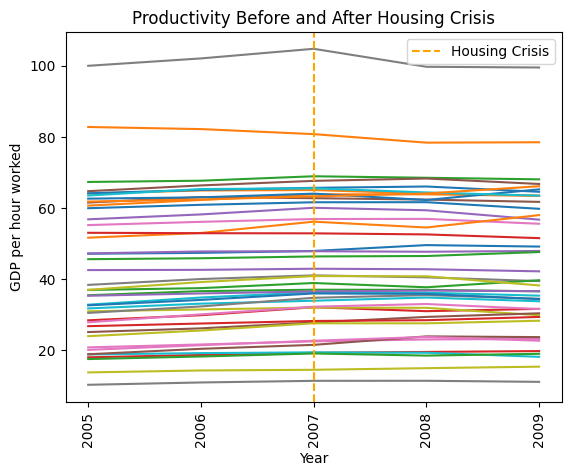

In [219]:
plt.plot(rawData.T, label=None)
plt.xticks(ticks=np.arange(0, len(headers)), labels=headers, rotation=90)
plt.axvline(x=2, c='orange', linestyle='dashed', label="Housing Crisis")
plt.legend()
plt.title("Productivity Before and After Housing Crisis")
plt.ylabel("GDP per hour worked")
plt.xlabel("Year")

In [220]:
changes = np.diff(rawData, axis=1)
averageChangeBefore = np.mean(changes[:, :2], axis=1)
averageChangeAfter = np.mean(changes[:, 2:], axis=1)
acceleration = averageChangeAfter - averageChangeBefore

# Sort acceleration and countries together
bothArrays = np.stack((countries, acceleration))
bothArrays = bothArrays[:, bothArrays[1, :].argsort()]
countries = bothArrays[0]
acceleration = bothArrays[1]

In [222]:
Australia = 'AUS'
Austria = 'AUT'
Belgium = 'BEL'
Bulgaria = 'BGR'
Canada = 'CAN'
Switzerland = 'CHE'
Chile = 'CHL'
Colombia = 'COL'
CostaRica = 'CRI'
CzechRepublic = 'CZE'
Germany = 'DEU'
Denmark = 'DNK'
Spain = 'ESP'
Estonia = 'EST'
Finland = 'FIN'
France = 'FRA'
UnitedKingdom = 'GBR'
Greece = 'GRC'
Croatia = 'HRV'
Hungary = 'HUN'
Ireland = 'IRL'
Iceland = 'ISL'
Israel = 'ISR'
Italy = 'ITA'
Japan = 'JPN'
Korea = 'KOR'
Lithuania = 'LTU'
Luxembourg = 'LUX'
Latvia = 'LVA'
Mexico = 'MEX'
Netherlands = 'NLD'
Norway = 'NOR'
NewZealand = 'NZL'
Poland = 'POL'
Portugal = 'PRT'
Romania = 'ROU'
Russia = 'RUS'
Slovakia = 'SVK'
Slovenia = 'SVN'
Sweden = 'SWE'
Turkey = 'TUR'
UnitedStates = 'USA'
SouthAfrica = 'ZAF'

# accordignly to https://www.cia.gov/the-world-factbook/field/location/

CentralEurope = [Austria, CzechRepublic, Germany, Hungary, Poland, Slovakia, Slovenia, Switzerland]
EasternEurope = [Estonia, Latvia, Lithuania]
NorthernEurope = [Denmark, Finland, Norway, Sweden, Iceland]
SouthEasternEurope = [Bulgaria, Croatia, Romania, Turkey]
SouthernEurope = [Greece, Italy]
SouthWesternEurope = [Portugal, Spain]
WesternEurope = [Belgium, France, Ireland, Luxembourg, Netherlands, UnitedKingdom]

Europe = [CentralEurope, EasternEurope, NorthernEurope, SouthEasternEurope, SouthernEurope, SouthWesternEurope, WesternEurope]
EuropeFlat =  [country for subregion in Europe for country in subregion]

In [223]:
colour = []
for country in countries:
    if country in EuropeFlat:
        colour.append('Blue')
    else:
        colour.append('Red')

/tmp/ipykernel_56646/2718115396.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(countries, rotation=90)


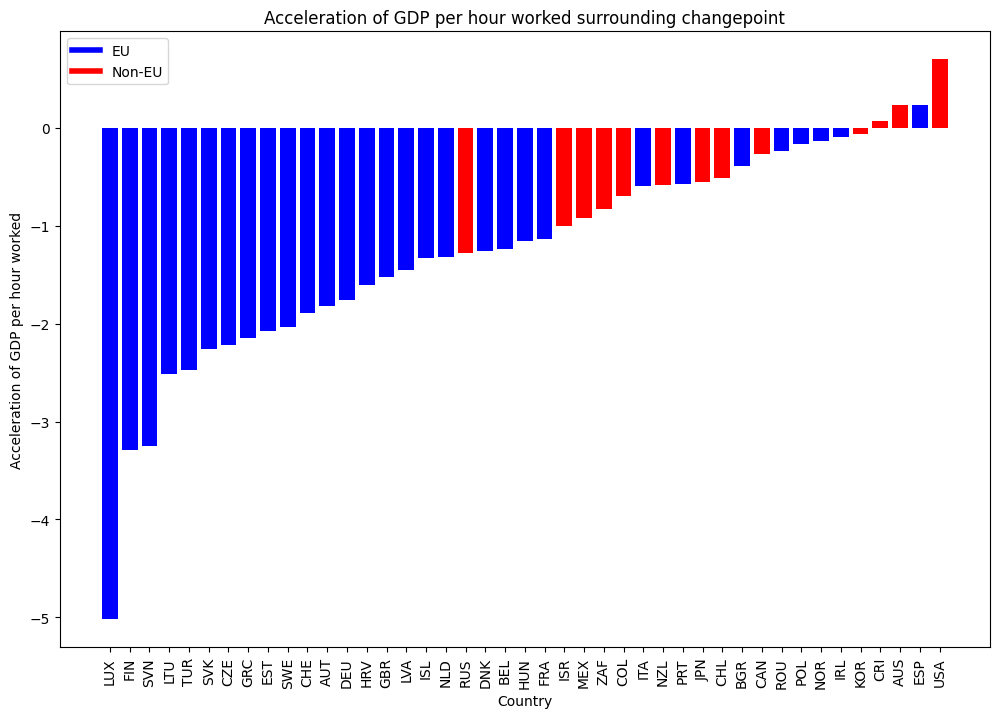

In [228]:
custom_lines = [Line2D([0], [0], color='Blue', lw=4),
                Line2D([0], [0], color='Red', lw=4)]

_, ax = plt.subplots(figsize=(12, 8))
ax.bar(countries, acceleration, color=colour)
ax.set_xticklabels(countries, rotation=90)
ax.set_title("Acceleration of GDP per hour worked surrounding changepoint")
ax.set_ylabel("Acceleration of GDP per hour worked")
ax.set_xlabel("Country")
ax.legend(custom_lines, ['EU', 'Non-EU'])